In [77]:
# Import utils
import sys
sys.path.append('/'.join(os.path.dirname(os.path.realpath('__file__')).split('/')[:-1])+'/utils')
from versions import version_0, version_1, version_2
from engine import con
from mismatch import mismatch_sql, finance_columns,\
                    area_columns, zoning_columns,\
                    geo_columns, bldg_columns,\
                    other_columns, create_plot
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [78]:
print(f'''
(0) current version: {version_0}
(1) previous version: {version_1}
(2) previous before previous version: {version_2}
''')


(0) current version: dcp_pluto."19v2_wo_corrections_backfill"
(1) previous version: dcp_pluto."19v2_w_corrections"
(2) previous before previous version: dcp_pluto."19v1"



In [79]:
def create_df_pct(sql, version_curr, version_prev, condition, con):
    df = pd.read_sql(
            sql=sql.format(version_curr, version_prev, condition), 
            con=con)
    total = df.loc[0, 'total']
    df_pct = df.loc[0, df.columns != 'total']/total
    df_pct['total'] = total
    return df_pct

## All records comparison

In [80]:
condition = ''

In [81]:
df0 = create_df_pct(mismatch_sql, version_0, version_1, condition, con)
df1 = create_df_pct(mismatch_sql, version_1, version_2, condition, con)

### Notes:
The address mismatch is expected, it's correcting previous address picking logic for condos

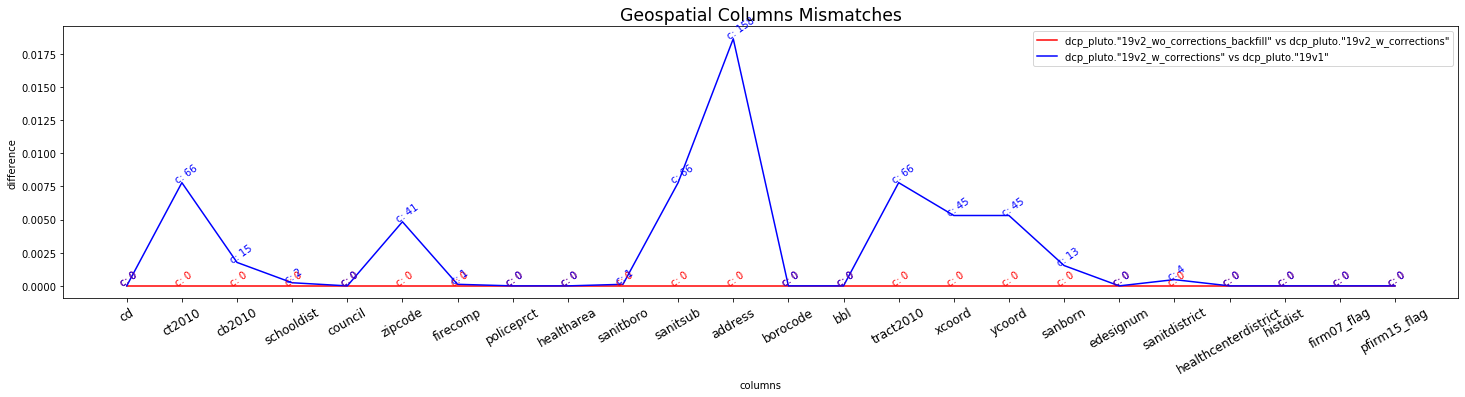

In [96]:
create_plot(df0, df1, geo_columns, f'Geospatial Columns Mismatches')

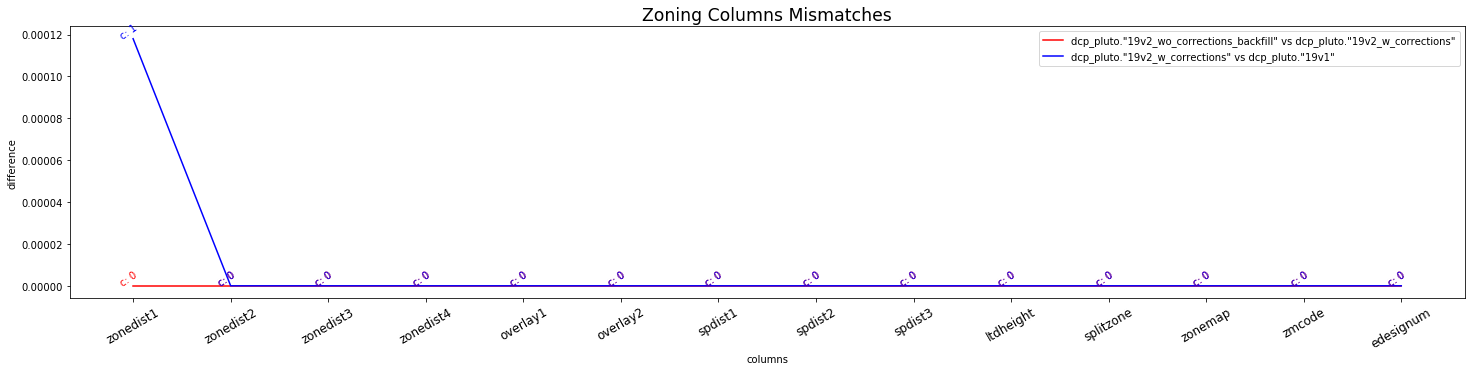

In [97]:
create_plot(df0, df1, zoning_columns,  f'Zoning Columns Mismatches')

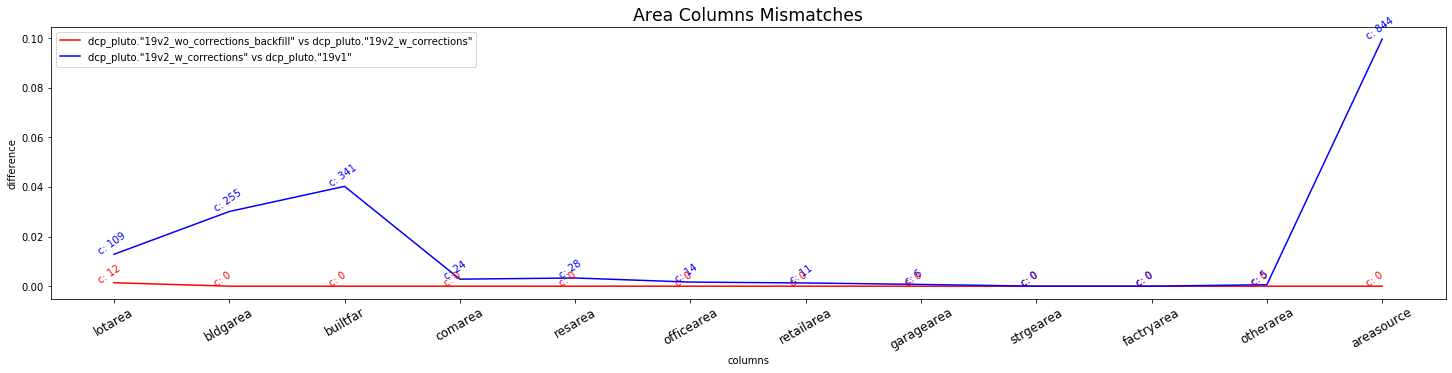

In [98]:
create_plot(df0, df1, area_columns,  f'Area Columns Mismatches')

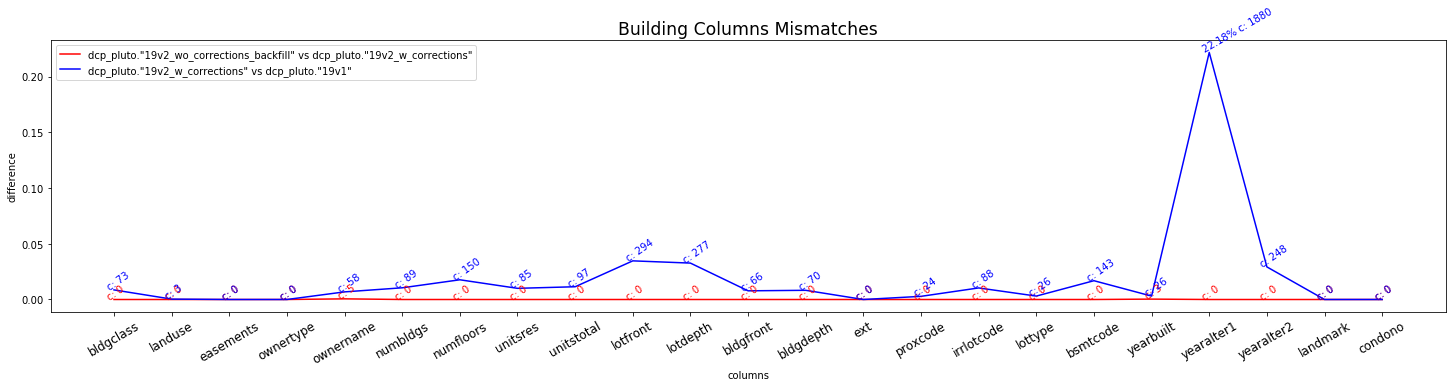

In [99]:
create_plot(df0, df1, bldg_columns,  f'Building Columns Mismatches')

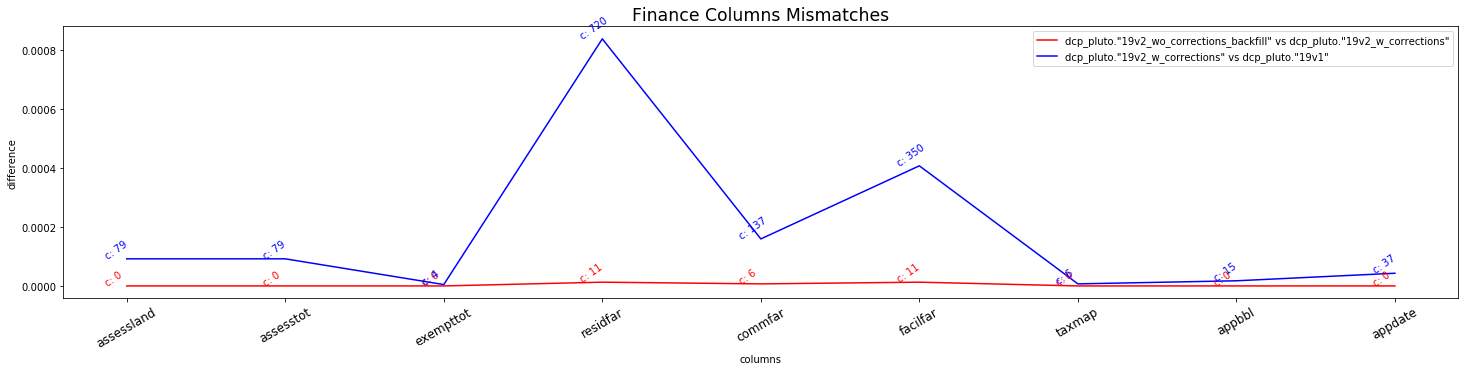

In [86]:
create_plot(df0, df1, finance_columns,  f'Finance Columns Mismatches')

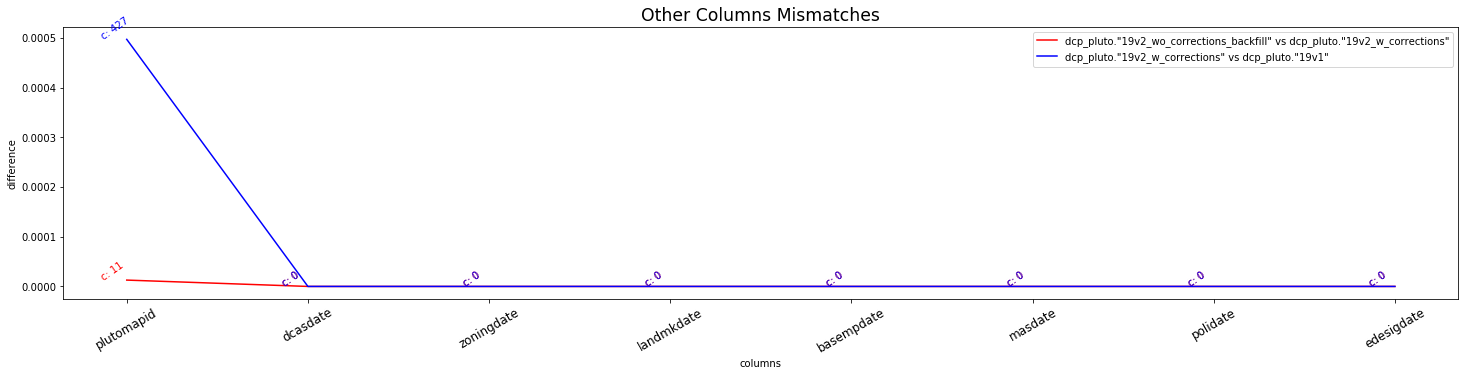

In [87]:
create_plot(df0, df1, other_columns,  f'Other Columns Mismatches')

# Condo

In [88]:
condition_condo = "WHERE right(bbl, 4) LIKE '75%%'"

In [89]:
df0 = create_df_pct(mismatch_sql, version_0, version_1, condition_condo, con)
df1 = create_df_pct(mismatch_sql, version_1, version_2, condition_condo, con)

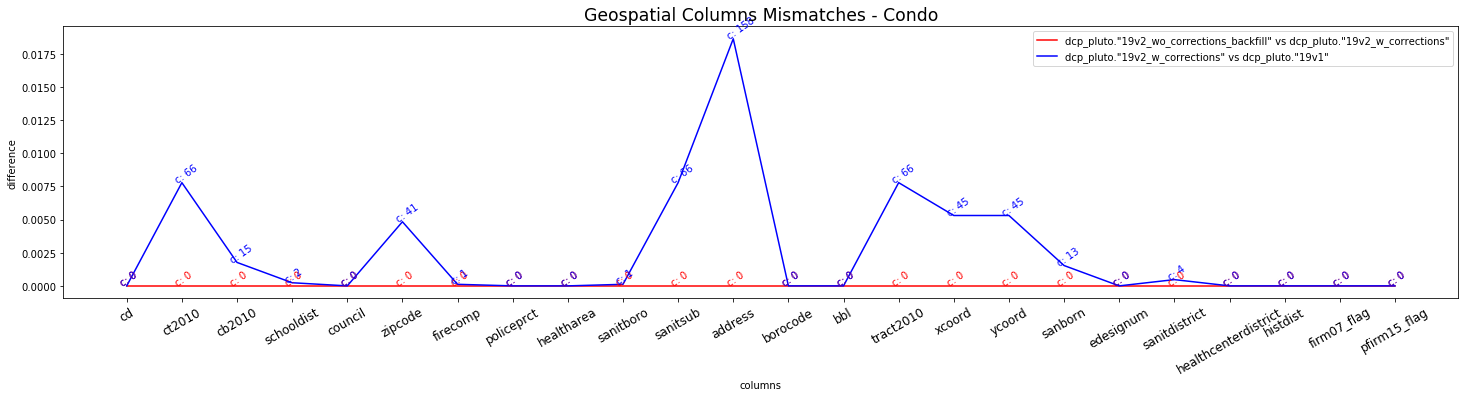

In [90]:
create_plot(df0, df1, geo_columns, f'Geospatial Columns Mismatches - Condo')

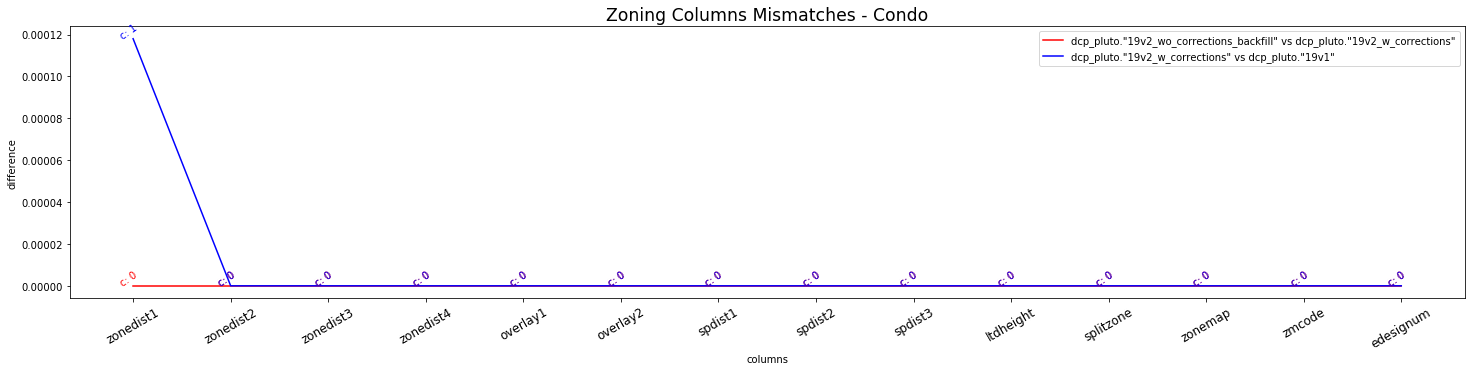

In [91]:
create_plot(df0, df1, zoning_columns,  f'Zoning Columns Mismatches - Condo')

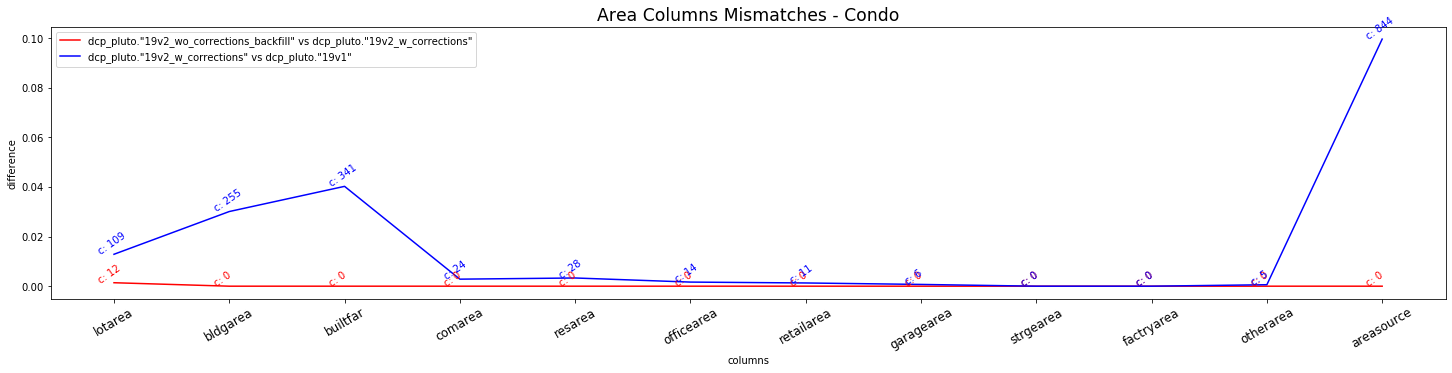

In [92]:
create_plot(df0, df1, area_columns,  f'Area Columns Mismatches - Condo')

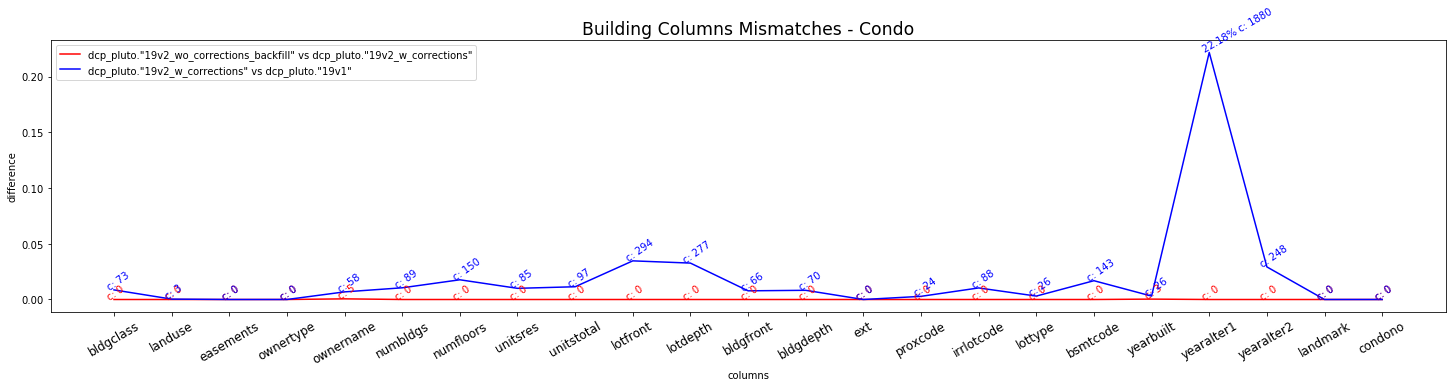

In [93]:
create_plot(df0, df1, bldg_columns,  f'Building Columns Mismatches - Condo')

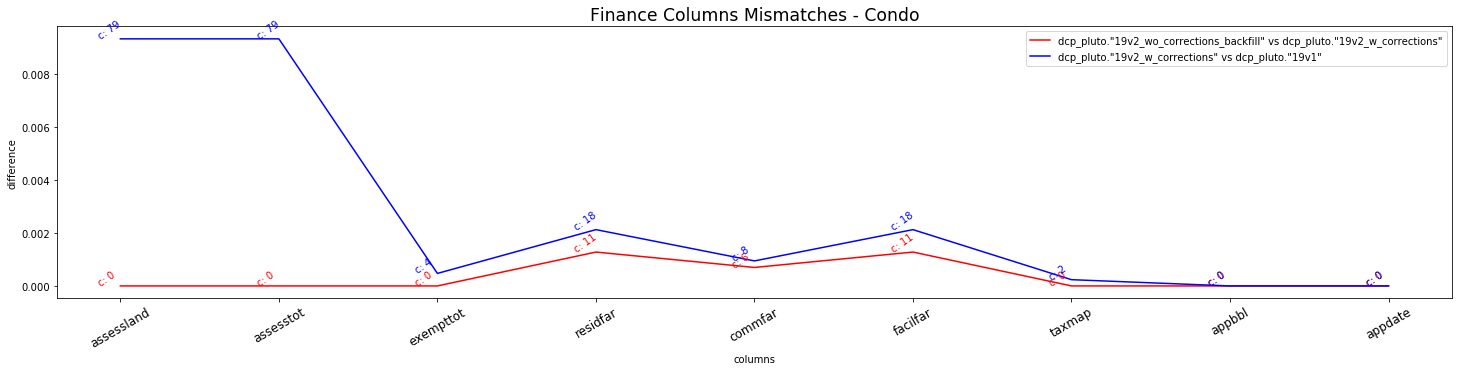

In [94]:
create_plot(df0, df1, finance_columns,  f'Finance Columns Mismatches - Condo')

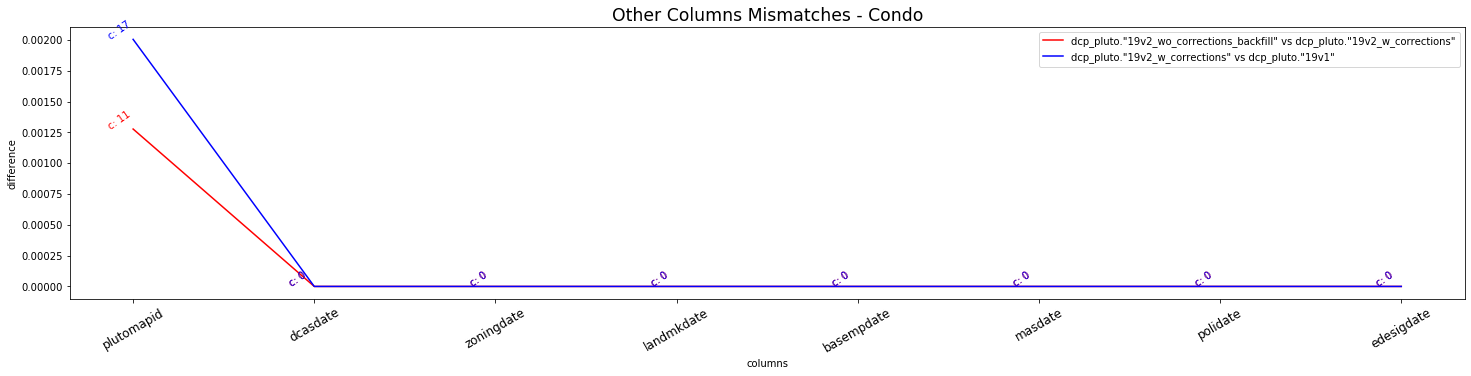

In [95]:
create_plot(df0, df1, other_columns,  f'Other Columns Mismatches - Condo')